## Hierachical clustering

In [6]:
import pandas as pd
ic_ts = pd.read_csv('/data/yma/500days/result/searchlight/ica/wellbeing7d_ic_ts_control_5470secs.csv',header=None).T
ic_names =[]
for i in range(100):
    ic_names.append('IC'+str(i+1))
renames_ic_ts={}
for x, ic in enumerate(ic_names):
    renames_ic_ts[ic]=ic_ts.iloc[x,:]
renames_ic_ts=pd.DataFrame(renames_ic_ts).T 
#renames_ic_ts_droped = renames_ic_ts.loc[['IC18','IC35','IC21','IC28','IC66','IC16', 
                                          #'IC90', 'IC26', 'IC19', 'IC47', 'IC70', 
                                          #'IC9', 'IC10', 'IC44','IC12','IC14',
                                          #'IC7', 'IC8', 'IC15','IC40','IC58','IC85',
                                          #'IC99','IC22','IC59','IC62', 'IC76','IC72',
                                          #'IC42','IC88', 'IC96', 'IC67','IC55','IC57',
                                          #'IC63', 'IC86', 'IC29','IC31','IC64','IC32', 
                                          #'IC54','IC60','IC87','IC80', 'IC51', 'IC68',
                                          #'IC43','IC50','IC78']]

(98.0, 120.0)

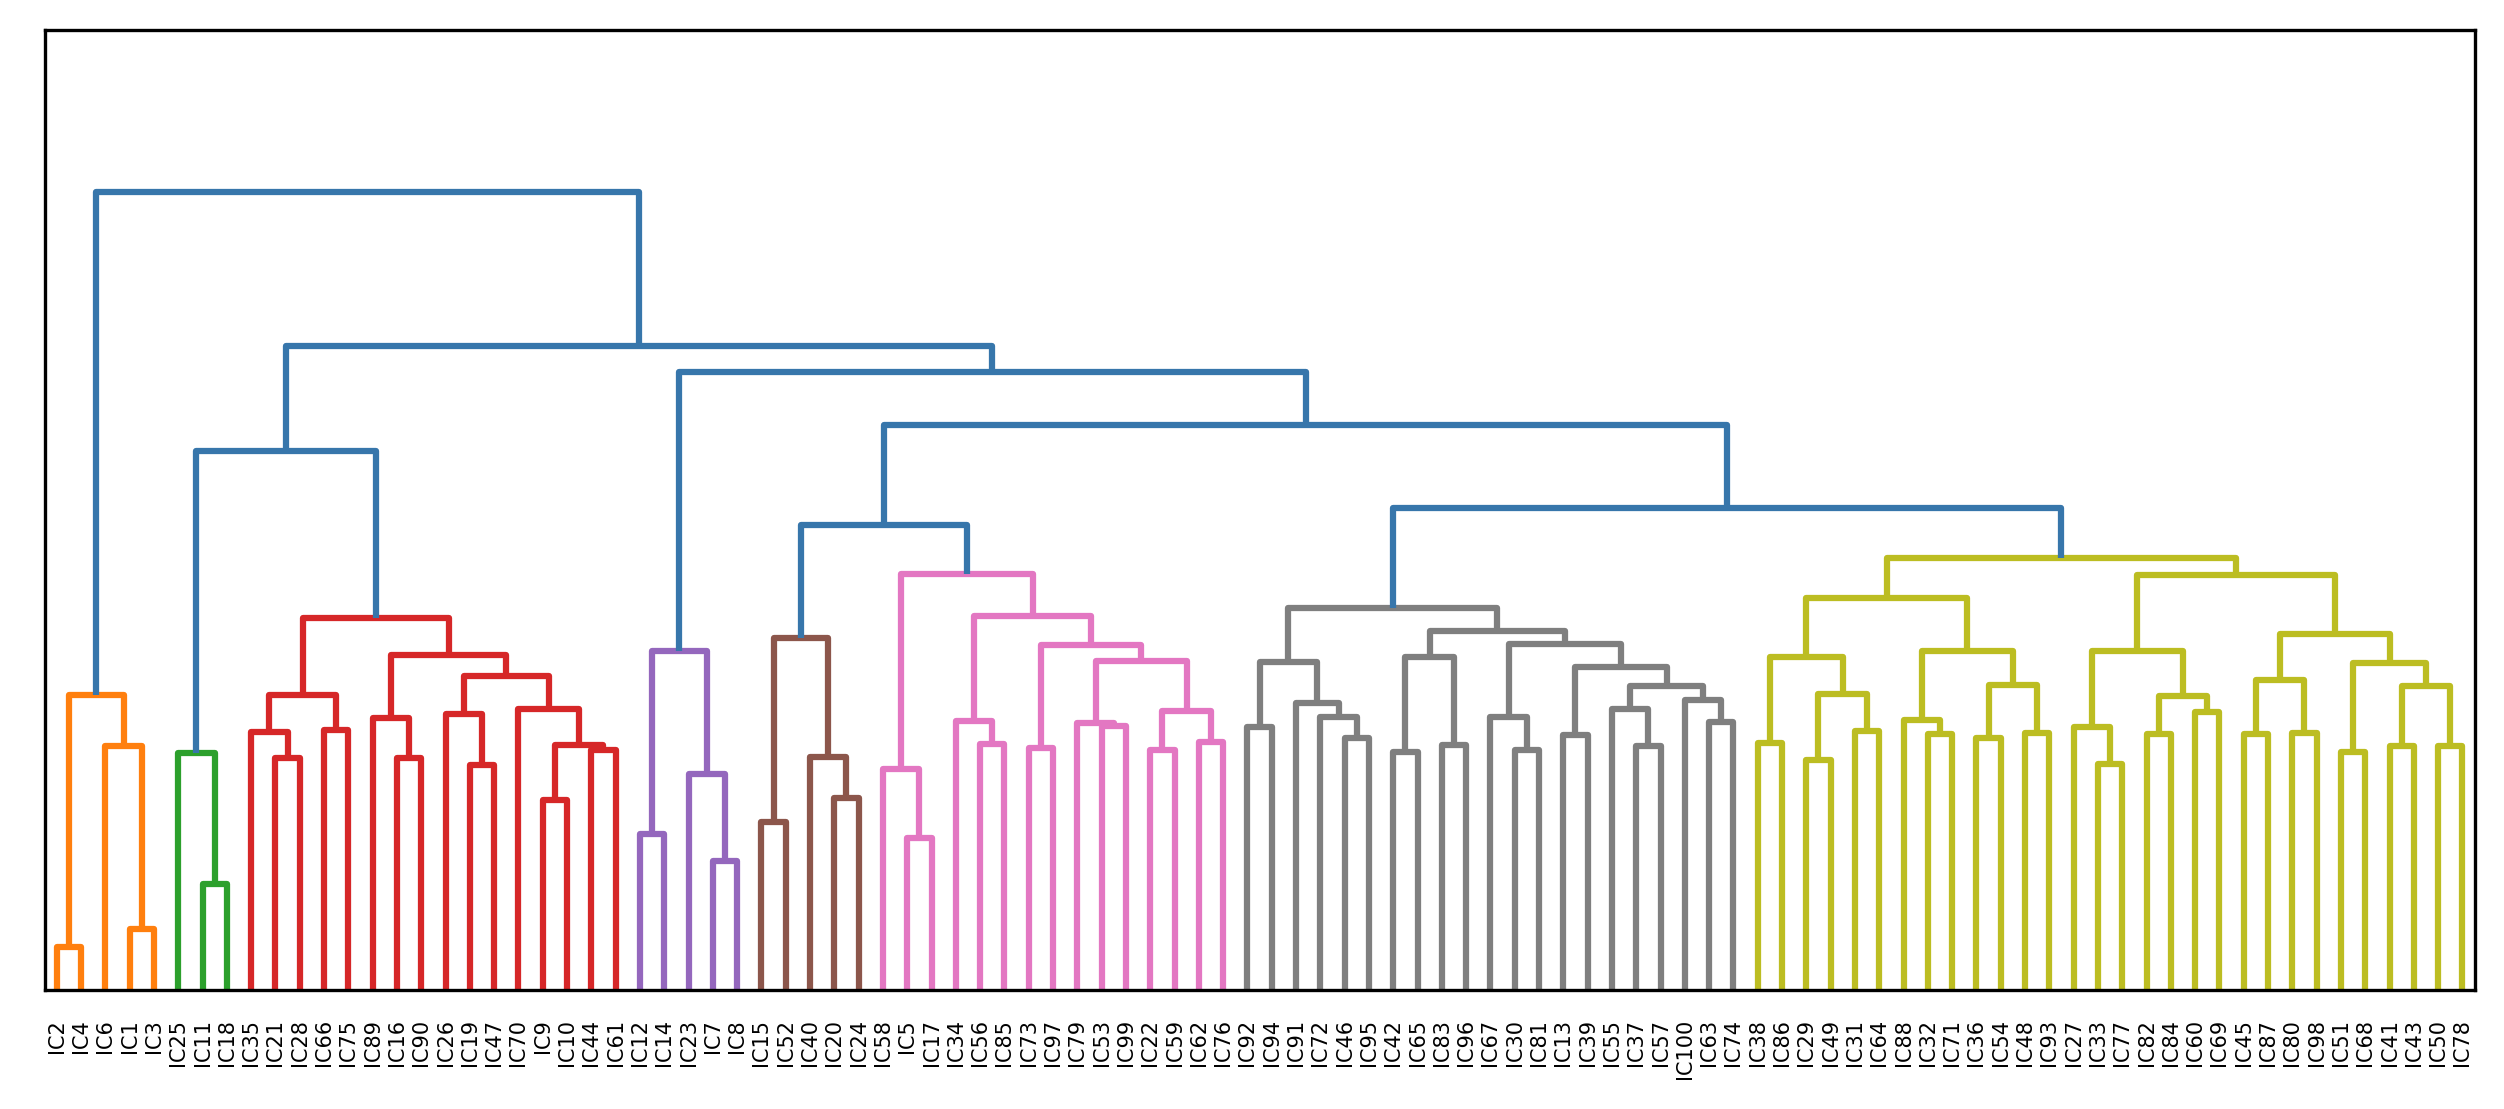

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
#from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list, set_link_color_palette
"""
fig = plt.figure(figsize=(5, 5),dpi=300)  
plt.figure(dpi=1200)
#plt.title("Dendrograms")  
Z=shc.linkage(renames_ic_ts, method='ward')
dend = shc.dendrogram(Z, no_labels = True,
                     truncate_mode = 'lastp', p = 8)
ax=fig.gca()
ax.set_ylim(100,ax.get_ylim()[1])
fig.show()
"""
fig = plt.figure(figsize=(9, 4),dpi=300)
fig.set_facecolor("w")
ax2 = fig.add_axes([0.05, 0.1, 0.9, 0.8])

Z=shc.linkage(#renames_ic_ts_droped,
              renames_ic_ts,
              method='ward')
#BCBD22----yellow clade1
#7F7F7F----grey clade2
#9467BD----purple clade3
#2CA02C----green clade4
#8C564B----brown clade5
#e377c2----pink clade6
#D62728----red clade7
#shc.set_link_color_palette(["#2CA02C", "#D62728","#9467BD","#8C564B","#e377c2","#7F7F7F","#BCBD22"])
dend = shc.dendrogram(Z,
                      #no_labels = True,
                     #truncate_mode = 'lastp', p = 8
                     labels = #renames_ic_ts_droped.index
                              renames_ic_ts.index
                      ,color_threshold=108, above_threshold_color='#3776ab')
#ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(98,120) #108, 95
#ax2.axis('off')
#plt.savefig('/data/yma/500days/result/searchlight/ica/wellbeing7d_7_cls_thre_ic_maps/100clades_100ic_ts_hierac_clustering_dendrogram_300dpi_nolabel_coloured.png')

## Mantel correction

In [ ]:
import pandas as pd 
ic_num_7d = {'1':93,'2':91,'3':90,'4':90,'5':90,'6':83,'7':48,'8':7}
p_series_7d={}
r_series_7d={}
for thre in range(8):
    p_series_7d[str(thre+1)]=pd.read_csv(f'/data/yma/500days/result/searchlight/ica/wellbeing7d_ic_perm_50cs/500days_searchlight_{ic_num_7d[str(thre+1)]}ics_normz{thre+1}_cs50_rois_isrsa_permutation10000_ps_wellbeing7dcontrol_1tail_mantel.csv',index_col=0).iloc[:,0]
    r_series_7d[str(thre+1)]=pd.read_csv(f'/data/yma/500days/result/searchlight/ica/wellbeing7d_ic_perm_50cs/500days_searchlight_{ic_num_7d[str(thre+1)]}ics_normz{thre+1}_cs50_rois_isrsa_permutation10000_rs_wellbeing7dcontrol_1tail_mantel.csv',index_col=0).iloc[:,0]

In [ ]:
drop_list = {'1':['ic45_t5200', 'ic48_t1414', 'ic73_t713', 'ic82_t3529', 
                    'ic83_t3464','ic84_t750', 'ic92_t279','ic94_t1317', 'ic95_t4515'],
             '2':['ic45_t5200', 'ic48_t1414', 'ic73_t713', 'ic82_t3529', 
                 'ic83_t3464','ic92_t279','ic94_t1317', 'ic95_t4515'],
             '3':['ic45_t5200', 'ic48_t1414', 'ic73_t713',
                  'ic83_t3464','ic92_t279','ic94_t1317', 'ic95_t4515'],
             '4':['ic45_t5200', 'ic48_t1414', 'ic73_t713',
                 'ic83_t3464','ic92_t279','ic94_t1317', 'ic95_t4515'],
             '5':['ic45_t5200', 'ic48_t1414', 'ic73_t713',
                 'ic83_t3464','ic92_t279','ic94_t1317', 'ic95_t4515'],
             '6':['ic48_t1414','ic73_t713',
                 'ic83_t3464','ic92_t279','ic94_t1317'],
             '7':['ic92_t279'],'8':[]}
p_series_7d_droped = {}
r_series_7d_droped = {}
for i in range(8):
    #if any(item in p_series_7d[f'{i+1}'].index for item in drop_list):
    p_series_7d_droped[f'{i+1}'] = p_series_7d[f'{i+1}'].drop(drop_list[f'{i+1}'])
    r_series_7d_droped[f'{i+1}'] = r_series_7d[f'{i+1}'].drop(drop_list[f'{i+1}'])
    print(i+1,len(p_series_7d_droped[f'{i+1}'].index),len(p_series_7d[f'{i+1}'].index),
         len(r_series_7d_droped[f'{i+1}'].index),len(r_series_7d[f'{i+1}'].index))

In [4]:
import numpy as np
mixmax_p_series_7d={}
mixmax_r_series_7d={}
for ic in list(p_series_7d_droped['1'].index):
    allthre_r = {}
    for thre in r_series_7d_droped:
        if ic in r_series_7d_droped[thre].index:
            allthre_r[thre]=(r_series_7d_droped[thre][ic])
    max_thre=list(allthre_r.keys())[np.argmax(list(allthre_r.values()))]
    mixmax_r_series_7d[ic+'_thre'+max_thre]=r_series_7d_droped[max_thre][ic]
    mixmax_p_series_7d[ic+'_thre'+max_thre]=p_series_7d_droped[max_thre][ic]
mixmax_r_series_7d=pd.Series(mixmax_r_series_7d)
mixmax_p_series_7d=pd.Series(mixmax_p_series_7d)


from statsmodels.stats.multitest import fdrcorrection
fdrsig_ics_mixmax_7d={}
ICs_list = []
peaktime_list = []
thress_list = []
rho_list = []
FDRcorrectedq_list = []
Uncorrectedp_list = []
for i,p in enumerate(fdrcorrection(mixmax_p_series_7d.values, alpha=0.01)[1]):
    #if s==True:
    if p<=0.01:
        #print(mixmax_p_series_7d.index[i],mixmax_r_series_7d.values[i],p, mixmax_p_series_7d.values[i])

        ICs_list.append(mixmax_p_series_7d.index[i].split('_')[0])
        peaktime_list.append(mixmax_p_series_7d.index[i].split('_')[1])
        thress_list.append(mixmax_p_series_7d.index[i].split('_')[2])
        rho_list.append(mixmax_r_series_7d.values[i])
        FDRcorrectedq_list.append(p)
        Uncorrectedp_list.append(mixmax_p_series_7d.values[i])
        
fdrsig_ics_mixmax_7d['IC'] = ICs_list
fdrsig_ics_mixmax_7d['Peak time'] = peaktime_list
fdrsig_ics_mixmax_7d['Z threshold'] = thress_list
fdrsig_ics_mixmax_7d['ρ'] = rho_list
fdrsig_ics_mixmax_7d['FDR corrected q'] = FDRcorrectedq_list
fdrsig_ics_mixmax_7d['Uncorrected p'] = Uncorrectedp_list
pd.DataFrame(fdrsig_ics_mixmax_7d)

,IC,Peak time,Z threshold,ρ,FDR corrected q,Uncorrected p
0,ic10,t3422,thre7,0.337184,0.000933,0.000100
1,ic12,t2502,thre4,0.369008,0.003600,0.001200
2,ic14,t1223,thre5,0.350840,0.003600,0.001100
3,ic15,t836,thre3,0.341348,0.005090,0.002000
4,ic16,t4027,thre2,0.513731,0.000933,0.000100
5,ic18,t9,thre2,0.375273,0.006299,0.003000
6,ic19,t4498,thre7,0.331980,0.003600,0.001200
7,ic21,t3645,thre4,0.281457,0.005519,0.002300
8,ic22,t3965,thre2,0.242990,0.006246,0.002900
9,ic26,t2096,thre2,0.363015,0.004064,0.001500


## Regression correction

In [9]:
import glob
import os
import numpy as np
import pandas as pd
file_list = glob.glob(os.path.join('/data/yma/500days/result/searchlight/ica/wellbeing7d_feature/regre_6inone','500days_searchlight100ica_wellbeing_isrsa_control_z*_regre_6inonemodel_shift4s_permby3secs_uncorrps.csv'))
file_list

['/data/yma/500days/result/searchlight/ica/wellbeing7d_feature/regre_6inone/500days_searchlight100ica_wellbeing_isrsa_control_zvalence_regre_6inonemodel_shift4s_permby3secs_uncorrps.csv',
 '/data/yma/500days/result/searchlight/ica/wellbeing7d_feature/regre_6inone/500days_searchlight100ica_wellbeing_isrsa_control_zsocial_regre_6inonemodel_shift4s_permby3secs_uncorrps.csv',
 '/data/yma/500days/result/searchlight/ica/wellbeing7d_feature/regre_6inone/500days_searchlight100ica_wellbeing_isrsa_control_zarousal_regre_6inonemodel_shift4s_permby3secs_uncorrps.csv',
 '/data/yma/500days/result/searchlight/ica/wellbeing7d_feature/regre_6inone/500days_searchlight100ica_wellbeing_isrsa_control_zspeaking_regre_6inonemodel_shift4s_permby3secs_uncorrps.csv']

In [10]:
valence_uncorrps=np.array(pd.read_csv(file_list[0],index_col=0).iloc[:,0])
social_uncorrps=np.array(pd.read_csv(file_list[1],index_col=0).iloc[:,0])
arousal_uncorrps=np.array(pd.read_csv(file_list[2],index_col=0).iloc[:,0])
speaking_uncorrps=np.array(pd.read_csv(file_list[3],index_col=0).iloc[:,0])
all_uncorrps=np.concatenate((speaking_uncorrps,valence_uncorrps,
                             arousal_uncorrps,social_uncorrps),axis=None)

In [12]:
from statsmodels.stats.multitest import fdrcorrection
for i,q in enumerate(fdrcorrection(all_uncorrps, alpha=0.05)[1]):
    if q<=0.05:
        print(i+1,q)

8 0.026664000266640002
35 0.034996500349965
99 0.04363200043632
105 0.013332000133320003
131 0.04363200043632
208 0.01999800019998
209 0.013332000133320003
221 0.013332000133320003
305 0.026664000266640002
352 0.03428228605710856
381 0.04363200043632
